<a href="https://colab.research.google.com/github/hiu04/Data-Science/blob/main/A3_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Regression and Regularization

*Author: Xiaoyu Ma*

*Date: July 11 2023*

**Scenario**
You've been provided the following data set on House Sales in King City. Your task is to build a regression model which can predict the price of a house, based on the features available.

*Variable Description*

- **id**:	Identification
- **date**:	Date sold
- **price**:	Sale price
- **bedrooms**:	Number of bedrooms
- **bathrooms**:	Number of bathrooms
- **sqft_living**:	Size of living area in square feet
- **sqft_lot**:	Size of the lot in square feet
- **floors**:	Number of floors
- **waterfront**:	‘1’ if the property has a waterfront, ‘0’ if not.
- **view**:	An index from 0 to 4 of how good the view of the property was
- **condition**:	Condition of the house, ranked from 1 to 5
- **grade**:	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value.Additional information in: KingCountyLinks to an external site.
- **sqft_above**:	Square feet above ground
- **sqft_basement**:	Square feet below ground
- **yr_built**:	Year built
- **yr_renovated**:	Year renovated. ‘0’ if never renovated
- **zipcode**:	5 digit zip code
- **lat**:	Latitude
- **long**:	Longitude
- **sqft_living15**:	Average size of interior housing living space for the closest 15 houses, in square feet
- **sqft_lot15**:	Average size of land lots for the closest 15 houses, in square feet


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [172]:
# import data
df = pd.read_csv("/content/kc_house_data.csv")

In [104]:
# view the first 5 observation in the data
df.head().transpose()

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## 1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.   
- You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
- Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

##2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?



- Data Cleaning

In [173]:
# change "date" from object to datatime
df['date'] = pd.to_datetime(df['date'])

There are 20 variables and 21613 observations in the original data set from 2014-05-02 to 2015-05-27. The dependent variable is price according to the question of the assignment. The goal is to find the relationships between other variables and price.

Notice that the current date variable is not convenient to use, especially the year in the date is useless since the observations are collected from 2014 to 2015. Thus, the next step is to change it to a dummy variable by quarter year.

In [174]:
# extract month from the date variable
df['month'] = df['date'].dt.month

In [175]:
# Create function to classify quarter
def quarter(x):
    if x >= 1 and x <= 3: # Jan to March as q1
        return 'q1'
    elif x >= 4 and x <= 6: # Apr to June as q2
        return 'q2'
    elif x >= 7 and x <= 9: # July to Sep as q3
        return 'q3'
    else:
        return 'q4' # Oct to Dec as q4

In [176]:
# create a new categorical variable named quater
df['quarter'] = df['month'].apply(quarter)

Change the integer values in "view", "condition", "grade" and "zipcode" to categorical since the integer is not meaningful while the corresponding level should be useful to detect the association.

In [177]:
# change variables from integer to categorical
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['zipcode'] = df['zipcode'].astype('category')

In [178]:
# change number in waterfront to meaningful word "yes"or "no"
df['waterfront'] = df['waterfront'].map({0: 'no', 1: 'yes'})

Notice that value 0 in yr_renovated variable means the house has no revovation, then replace the 0 to the building time.

In [180]:
# replace 0 in yr_renovated to corresponding yr_built
df.loc[df["yr_renovated"] == 0, "yr_renovated"] = df.loc[df["yr_renovated"] == 0, "yr_built"]

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  object        
 9   view           21613 non-null  category      
 10  condition      21613 non-null  category      
 11  grade          21613 non-null  category      
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [188]:
df.describe(include = 'all')

<ipython-input-188-74aa2f970831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,quarter
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613,21613.0,...,21613.000000,21613.000000,21613.000000,21613.0,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,2,5.0,...,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,4
top,NaN,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,no,0.0,...,NaN,NaN,NaN,98103.0,NaN,NaN,NaN,NaN,NaN,q2
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,21450,19489.0,...,NaN,NaN,NaN,602.0,NaN,NaN,NaN,NaN,NaN,6825
first,NaN,2014-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,NaN,NaN,...,291.509045,1971.005136,1973.386018,NaN,47.560053,-122.213896,1986.552492,12768.455652,6.574423,NaN
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,NaN,NaN,...,442.575043,29.373411,28.806854,NaN,0.138564,0.140828,685.391304,27304.179631,3.115308,NaN
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,...,0.000000,1900.000000,1900.000000,NaN,47.155900,-122.519000,399.000000,651.000000,1.000000,NaN
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,NaN,NaN,...,0.000000,1951.000000,1954.000000,NaN,47.471000,-122.328000,1490.000000,5100.000000,4.000000,NaN


- Using statsmodels OLS

In [189]:
# ols
# using all variables excpet id, zipcode, lat and long, month, date
mod1 = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + \
     waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + \
     yr_renovated + zipcode + sqft_living15 + sqft_lot15 + quarter", data=df).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1078.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:28:43   Log-Likelihood:            -2.8804e+05
No. Observations:               21613   AIC:                         5.763e+05
Df Residuals:                   21510   BIC:                         5.771e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.319e+05   1.94e+0

In [ ]:
# check summary again by dropping coefficients have p-value larger than 0.05
# (e.g., grade) but R^2 is lower now (0.805)
mod2 = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + \
     waterfront + view + condition + sqft_above + sqft_basement + yr_built + \
     yr_renovated + zipcode + sqft_living15 + sqft_lot15 + quarter", data=df).fit()
print(mod2.summary())

In [191]:
# stick with mod1 and calculate the predict values under mod1 (y hat)
pred_vals = mod1.predict(df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
 'waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
 'zipcode','sqft_living15','sqft_lot15','month','quarter']])

In [192]:
# calculate the residuals
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)
# error = predict valu - true value
res['error'] = res['y_hat'] - res['price']
# square error
res['sq_error'] = res['error']**2
# mean squrare error
err1 = np.sqrt(res['sq_error'].mean())
err1

148511.8212216835

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-3615312.99242286, -3145350.55200117, -2197122.21825421, ...,
          1099475.9658654 ,  1151035.69771001,  1579736.0242397 ])),
 (130466.03876753201, 1.0689815063148971e-07, 0.8783328778250101))

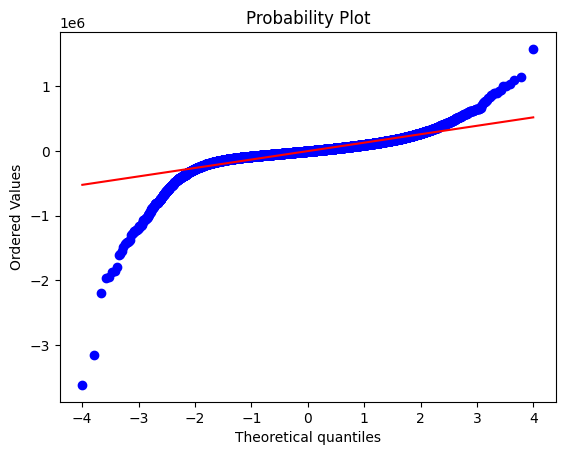

In [193]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

The Q-Q plot shows that the error does not follow a normal distribution, which violates the assumption of linear regression. Therefore, the linear model is not a good choice to find the association between other variables and price using this data set. Also, from the notes of summary result, strong multicollinearity problem is mentioned, then adding penalty terms to the models such as building LASSO or Ridge models, or using stepwise methods, may improve the model.

- Using scikit-learn

In [119]:
! pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [194]:
# separate features and target
categorical_features = ['waterfront','view','condition','grade','zipcode', 'quarter']
numerical_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
                      'sqft_above','sqft_basement','yr_built','yr_renovated',
                      'sqft_living15','sqft_lot15']
target = 'price'

In [195]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],
                                                    df[target],
                                                    test_size = 0.3, random_state=2324)

In [196]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [197]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])



1.   Linear regression




In [198]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [199]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'zipcode', 'quarter']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated',
                                                   'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', LinearRegression())])

In [200]:
pred = linear_regression.predict(X_test)

In [201]:
from sklearn.metrics import mean_squared_error
err2 = np.sqrt(mean_squared_error(pred,y_test))
err2

143930.89809419838

2. Ridge Regression

In [202]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=2))
])

In [203]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'zipcode', 'quarter']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated',
                                                   'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', Ridge(alpha=2))])

In [204]:
pred_ridge = ridge_regression.predict(X_test)
err3 = np.sqrt(mean_squared_error(pred_ridge,y_test))
err3

142886.9906616979

3. Lasso Regression

In [205]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.8))
])

In [206]:
lasso_regression.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26749871417834.844, tolerance: 204734564821.1916
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'zipcode', 'quarter']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated',
                                                   'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', Lasso(alpha=0.8))])

In [207]:
lasso_pred = lasso_regression.predict(X_test)
err4 = np.sqrt(mean_squared_error(lasso_pred, y_test))
err4

143918.31469454573

4. Elasticnet regression

In [208]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [209]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'zipcode', 'quarter']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated',
                                                   'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [210]:
elasticnet_pred = elasticnet_regression.predict(X_test)
err5 = np.sqrt(mean_squared_error(elasticnet_pred, y_test))
err5

229573.28024871938

In [211]:
err = {'OLS': f'{round(err1,4)}',
    'Linear': f'{round(err2,4)}',
    'Ridge': f'{round(err3,4)}',
    'Lasso': f'{round(err4,4)}',
    'Elasticnet': f'{round(err5,4)}'}
print(min(err, key=err.get),"is the one has the smallest mean square error and \
the error is", err[min(err, key=err.get)],".")

Ridge is the one has the smallest mean square error and the error is 142886.9907 .


The ridge regression has the lowest mean square error, thus, this model is chosen.

## 3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

<ipython-input-212-19039c682505>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


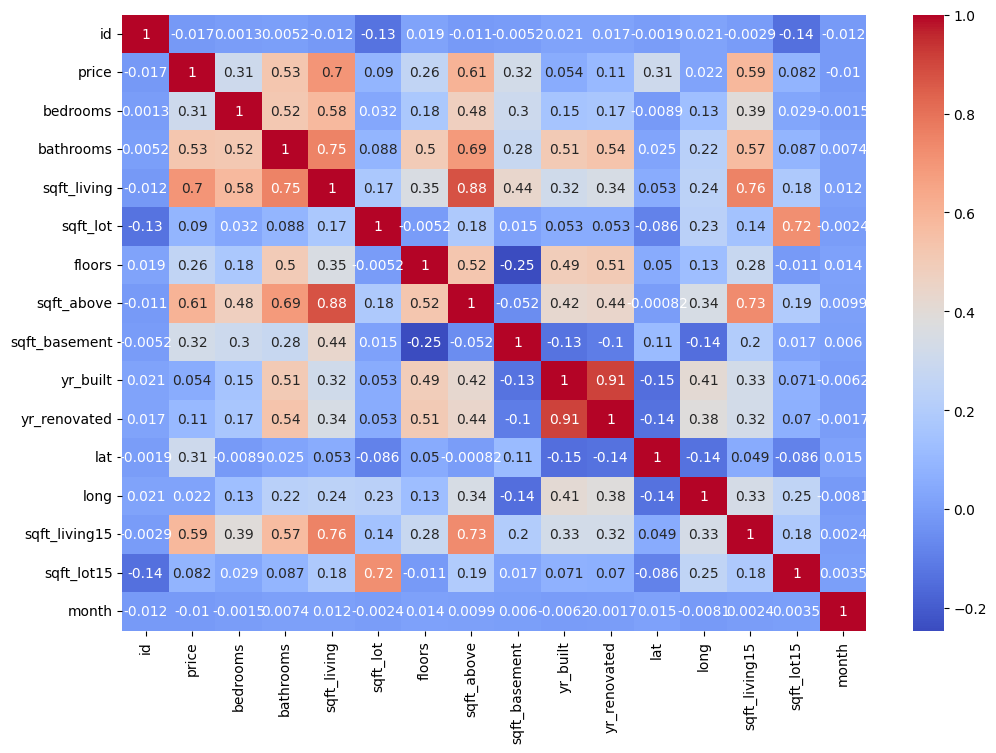

In [212]:
import seaborn as sns
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

From the heatmap, the relationship between each numerical variable is shown. According to the plot and the values, it demonstrates that sqft_living, sqft_above, bathrooms and sqft_living15 have relatively greater impacts on price.

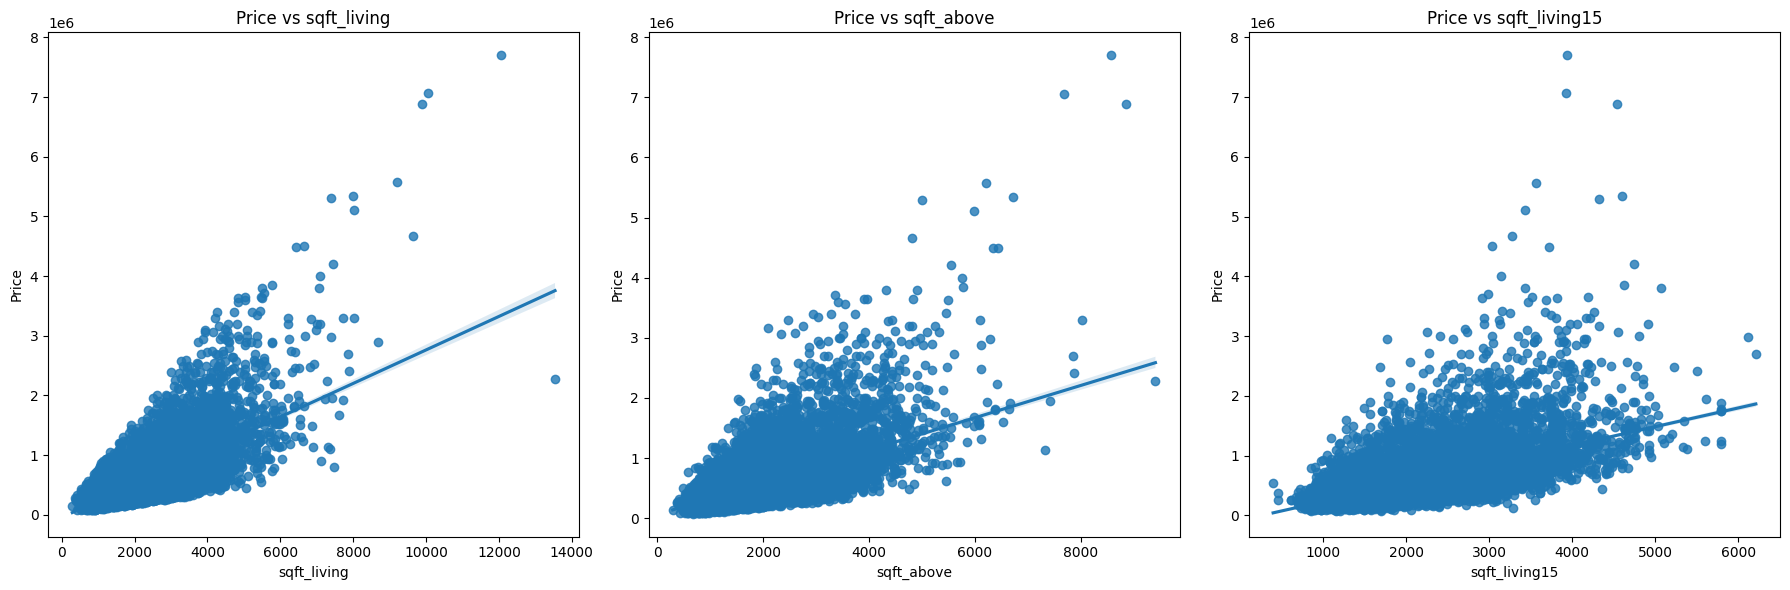

In [213]:
x_var = ['sqft_living', 'sqft_above', 'sqft_living15']
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

for i, x_var in enumerate(x_var):
    ax = axes[i]
    sns.regplot(data=df, x=x_var, y='price', ax=ax)
    ax.set_xlabel(x_var)
    ax.set_ylabel('Price')
    ax.set_title(f'Price vs {x_var}')
plt.tight_layout()
plt.show()

- Results based on the ridge regression model

In [214]:
# names for the categorical variables
cat_names = ridge_regression.named_steps['preprocessor'].transformers_[0][1].\
named_steps['onehot'].get_feature_names_out()

# numerical feature names
num_names = ridge_regression.named_steps['preprocessor'].transformers_[1][2]

# Combine the feature names
all_names = np.concatenate([cat_names, num_names])

# Ridge regression coefficients
ridge_coef = ridge_regression.named_steps['regressor'].coef_

# store the coefficients and corresponding feature names
coef_df = pd.DataFrame({'Feature': all_names, 'Coefficient': ridge_coef})

# Sort the DataFrame by the coefficient values in descending order
sorted_coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

for index, row in sorted_coef_df.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']}")


grade_13: 1406041.4567391025
zipcode_98039: 896330.8332391843
zipcode_98004: 559158.9072713037
grade_12: 494068.0101978032
zipcode_98112: 430431.32073029416
zipcode_98109: 311087.09515931335
zipcode_98102: 307075.95393947535
zipcode_98119: 296725.215786093
zipcode_98040: 294751.76442973095
zipcode_98105: 294612.86322521407
waterfront_yes: 270468.2911388137
zipcode_98199: 201795.72819540487
zipcode_98033: 163102.69954916983
zipcode_98122: 161048.79477993568
zipcode_98107: 157563.3807582093
zipcode_98103: 154281.13921376658
view_4: 147663.79095210668
zipcode_98115: 144205.0082666682
zipcode_98117: 125822.67522821581
zipcode_98005: 106407.39817377999
zipcode_98116: 99447.38972031359
zipcode_98144: 96027.4791037934
condition_5: 77134.31217367346
sqft_living: 74886.31566061749
sqft_above: 74445.55965706166
grade_11: 74141.2984963421
zipcode_98008: 58807.33958082793
zipcode_98007: 55438.696609707215
zipcode_98136: 53299.6266152445
zipcode_98006: 45593.103459335405
zipcode_98052: 42950.740951

*Factors that lead to the greatest increment in price:*

Keeping all other conditions at the same, if
*   House has **grade 13, 12, 11**, then the price increases 1406041, 494068, 74141 respectively compared to the base level of Grade 1. Thus, higher-quality buildings have higher prices.
*   Houses in **zipcode 98039, 98004, 98112** areas increases the price in 896331, 559159, 430431 respectively compared to the base level of Zipcode 98001. Other areas such as 98109, 98102, 98119, 98040, and 98105 have great positive impacts on price as well.
*   The price of a house that has a **waterfront** is 270468 higher than one that has not.
*   House with a good **View of 4** has a 147664 increase in price compared to ones with bad view of 0.
*   House has **dondition of 5** has a 77134 increase in price compared to the ones with bad Condition of 1.
*   One unit increase in the living areas (**sqft_living**), the price increases 74886 dollars.
*   One unit increase in the areas above ground (**sqft_above**), the price increases 74446 dollars.
*   One year later to renovate (**yr_renovate**) or build the house, the price increases 32279 dollars.
*   One more **bathroom** in the house, the price increase by 21835 dollars.
*   One unit increase in the basement areas (**sqft_basement**), the price increases  by 15806 dollars.
*   One unit increase in **sqft_living15**, the average size of interior housing living space for the closest 15 house, then the price increases  by 12757 dollars.

In addition, the coefficient for yr_renovated is positive while the yr_built is negative, meaning that renovating the house can have more positive impacts on the price. Meanwhile, the listings in the first two quarters (January to March, April to June) have higher prices.

In [219]:
grade1 = df[df['grade'].isin([11,12,13])]
# average price for grade 11, 12, 13 houses located in zipcode 98039, 98004, 98112 areas is about 2.6 million
grade1[grade1['zipcode'].isin([98039, 98004, 98112])]['price'].describe()

count    7.100000e+01
mean     2.660420e+06
std      1.155950e+06
min      1.125000e+06
25%      1.875850e+06
50%      2.328000e+06
75%      3.134375e+06
max      7.062500e+06
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

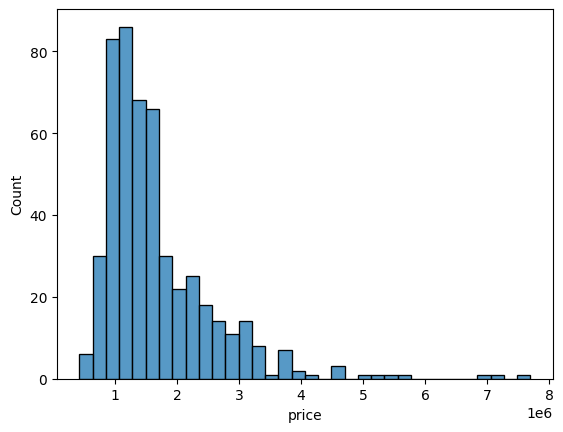

In [218]:
sns.histplot(x = 'price', data = grade1)  # average price for grade 11, 12, 13 housesis about 1.5 million

In contrast, house in the following conditions has lower price by oberseving large negative coefficients in the results:

*   Zipcode 98198, 98022, 98070, 98023, 98092
*   Grade 4, 5, 6, 7, 8, 9
*   No waterfront

In [220]:
grade2 = df[df['grade'].isin([4,5,6,7,8,9])]
grade2['price'].describe() # average price with grade 4, 5, 6, 7, 8, 9 is 0.48 million (480 thousand)

count    1.997300e+04
mean     4.813550e+05
std      2.434235e+05
min      7.800000e+04
25%      3.125000e+05
50%      4.310000e+05
75%      5.900000e+05
max      3.070000e+06
Name: price, dtype: float64

In [221]:
# average price for grade 4 to 9 houses located in zipcode 98198, 98022, 98070,
# 98023, 98092 areas is about 0.31 million
grade2[grade2['zipcode'].isin([98198, 98022, 98070, 98023, 98092])]['price'].describe()

count    1.434000e+03
mean     3.117330e+05
std      1.276702e+05
min      8.650000e+04
25%      2.350000e+05
50%      2.805000e+05
75%      3.500000e+05
max      1.379900e+06
Name: price, dtype: float64

To conclude, from the buyer aspect, they can consider the house in zipcode 98198, 98022, 98070, 98023, and 98092 areas without waterfront, and invest in the first half of the year. The houses with medium quantities with grade 4 to 9 are also some options with an average price of about 0.48 million dollars. However, for the sellers, if they want to increase the selling prices, the house in Zipcode 98039, 98004, and 98112 with grade 11,12 or 13, and view of 4, condition of 5, and more bathrooms would be more competitive, as well as greater square feet in living areas, areas above the ground, and basement. In particular, the average price for grade 11, 12, 13 houses located in zipcode 98039, 98004, 98112 areas is about 2.6 million. The renovation is beneficial to increase the selling price, too. Moreover, it is better for those sellers to post the lists in the second half of the year.